In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pytrends as pt
from pytrends.request import TrendReq
pytrend = TrendReq()
import inspect
import sqlite3
from pathlib import Path as Path



In [3]:
udemy = pd.read_csv(r'C:\DS project\udemy_courses.csv')
edx = pd.read_csv(r'C:\DS project\edx_courses.csv')

In [4]:
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [4]:
udemy.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [5]:
udemy.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
udemy = udemy.drop(columns = ['course_id', 'url', 'course_title'])

In [7]:
udemy

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...
3673,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [8]:
udemy.isna().sum()

is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'num_subscribers'}>],
       [<AxesSubplot:title={'center':'num_reviews'}>,
        <AxesSubplot:title={'center':'num_lectures'}>],
       [<AxesSubplot:title={'center':'content_duration'}>,
        <AxesSubplot:>]], dtype=object)

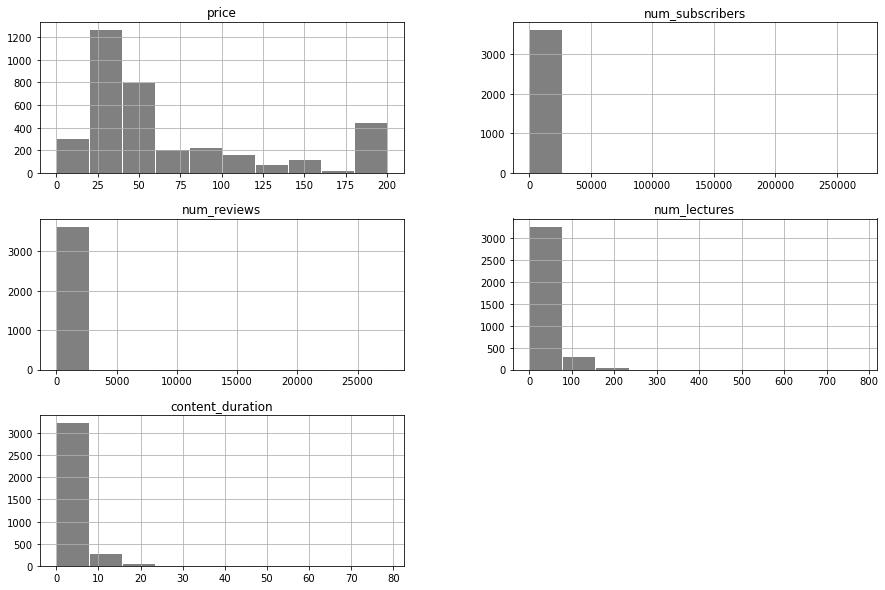

In [9]:
udemy.hist(figsize=(15, 10), edgecolor='white', color='grey', grid=True)

In [10]:
udemy_col_num = udemy.loc[:, ~udemy.columns.isin(['is_paid', 'level', 'published_timestamp', 'subject'])]
udemy_col_num

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.5
1,75,2792,923,274,39.0
2,45,2174,74,51,2.5
3,95,2451,11,36,3.0
4,200,1276,45,26,2.0
...,...,...,...,...,...
3673,100,1040,14,21,2.0
3674,25,306,3,42,3.5
3675,40,513,169,48,3.5
3676,50,300,31,38,3.0


In [11]:
udemy_outliers = (np.abs(stats.zscore(udemy_col_num)) < 3).all(axis=1)

In [12]:
udemy_outliers

0        True
1       False
2        True
3        True
4        True
        ...  
3673     True
3674     True
3675     True
3676     True
3677     True
Length: 3678, dtype: bool

In [13]:
outlier_rows = udemy_col_num[~udemy_outliers]

In [14]:
udemy_col_num_filtered = udemy_col_num[udemy_outliers]

Text(0.5, 1.0, 'Numerical columns without outliers')

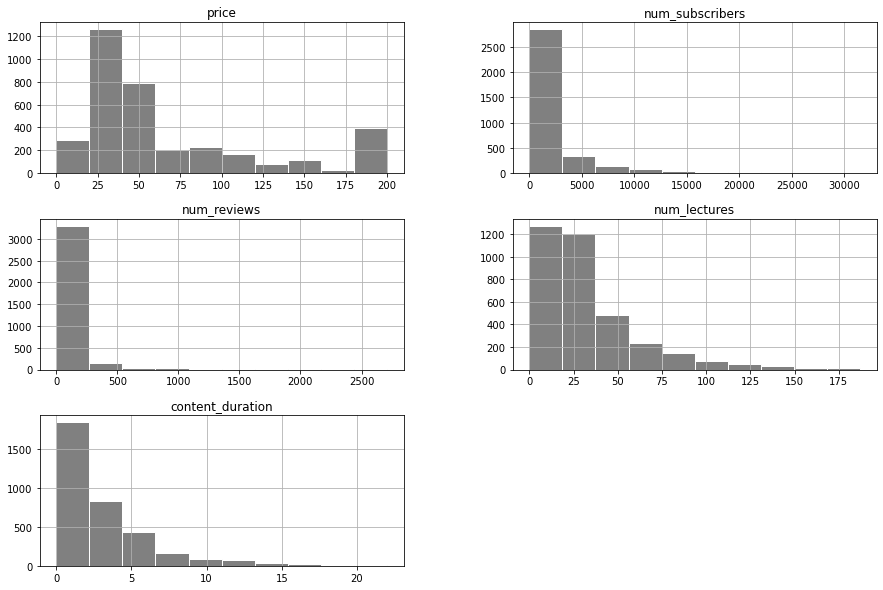

In [15]:
udemy_col_num_filtered.hist(figsize=(15, 10), edgecolor='white', color='gray', grid=True)
plt.title("Numerical columns without outliers")

Text(0.5, 1.0, 'Numerical columns with outliers')

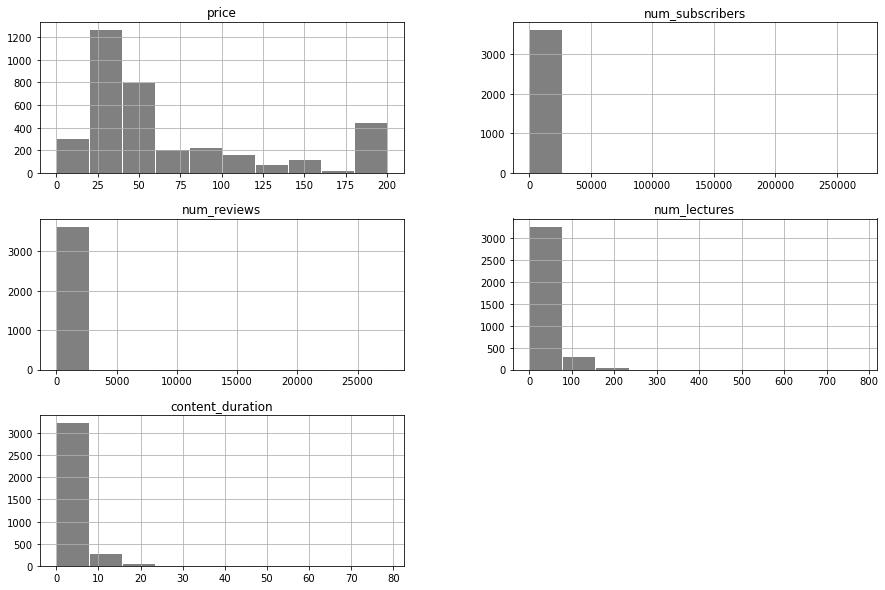

In [16]:
udemy_col_num.hist(figsize=(15, 10), edgecolor='white', color='grey', grid=True)
plt.title("Numerical columns with outliers")

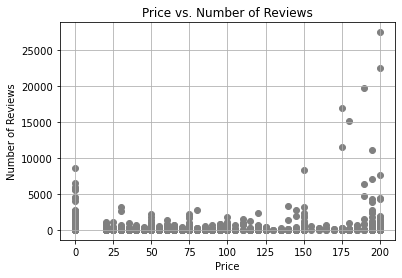

In [17]:
plt.scatter(udemy['price'], udemy['num_reviews'], color = 'grey')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

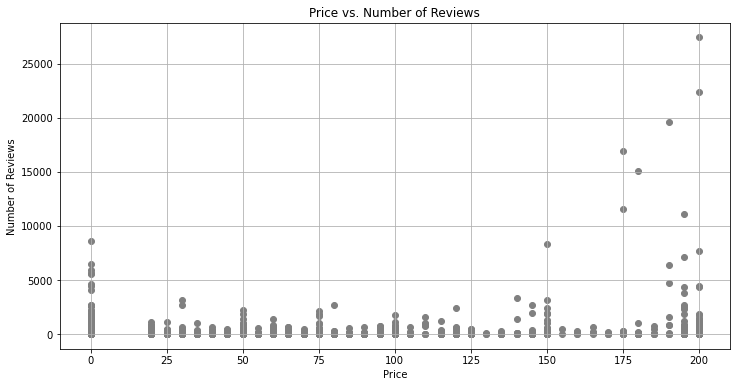

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(udemy['price'], udemy['num_reviews'], color="grey")
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

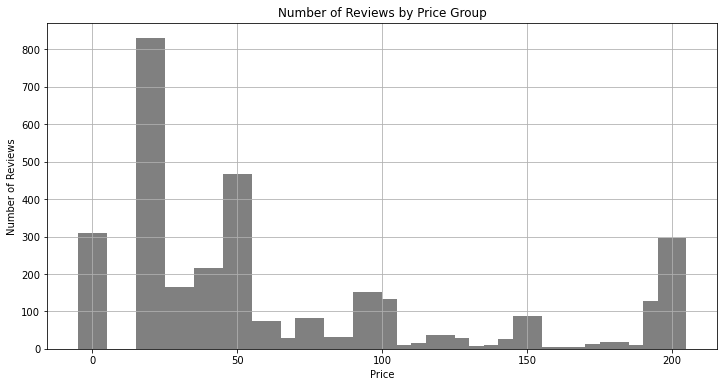

In [19]:
price_reviews = udemy.groupby('price')['num_reviews'].count()

fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(price_reviews.index, price_reviews.values, width = 10, color = 'grey')

plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Price Group')
plt.grid()
plt.show()

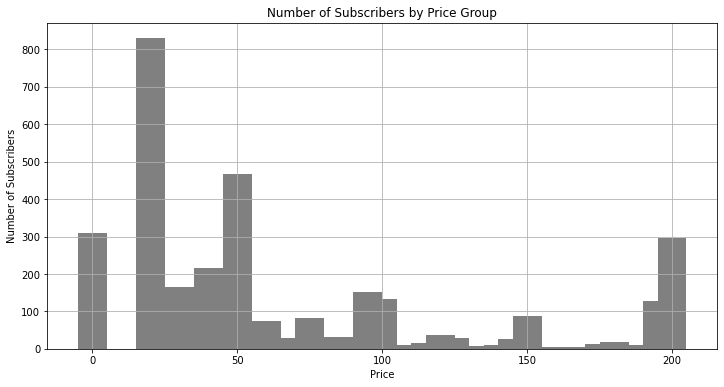

In [20]:
price_reviews = udemy.groupby('price')['num_subscribers'].count()

fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(price_reviews.index, price_reviews.values, width = 10, color = 'grey')

plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers by Price Group')
plt.grid(True)
plt.show()

In [21]:
level_counts = udemy['level'].value_counts()

level_counts

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<AxesSubplot:>

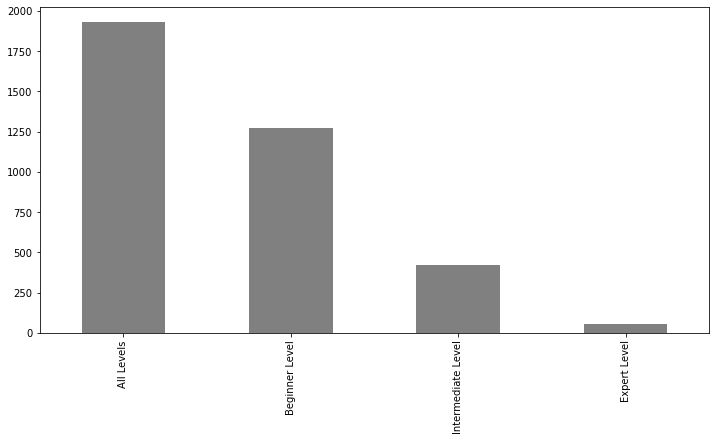

In [22]:
level_counts.plot(kind='bar', color = 'grey', figsize = (12, 6))

Text(0.5, 1.0, 'Number of Subscribers vs. Number of Reviews')

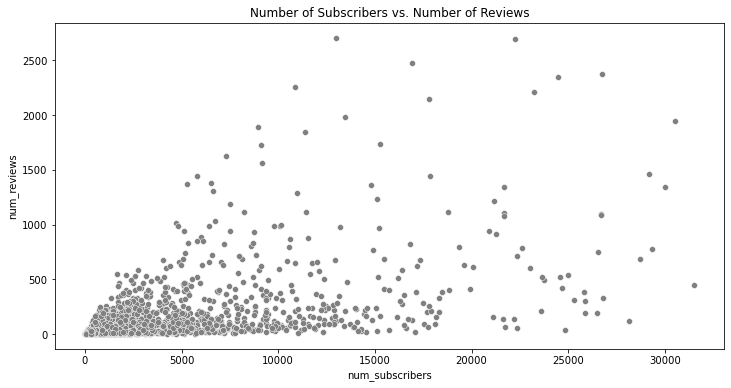

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=udemy_col_num_filtered, x='num_subscribers', y='num_reviews', color='grey')
plt.title('Number of Subscribers vs. Number of Reviews')

Text(0.5, 1.0, 'Number of Courses by Subject')

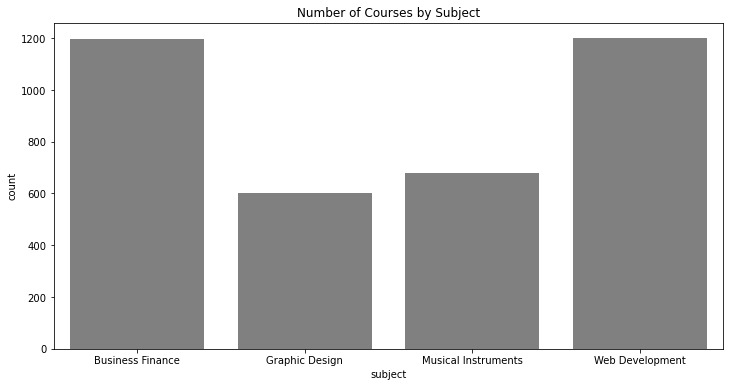

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=udemy, x='subject', color='grey')
plt.title('Number of Courses by Subject')

In [25]:
#Porównanie wyszukiwań google Udemy vs Edx w 5-cio letnim horyzoncie

In [26]:
kw_list_udemy = ['Udemy']

In [27]:
pytrend.build_payload(kw_list_udemy, timeframe='today 5-y')

In [28]:
df_udemy = pytrend.interest_over_time()

<AxesSubplot:xlabel='date'>

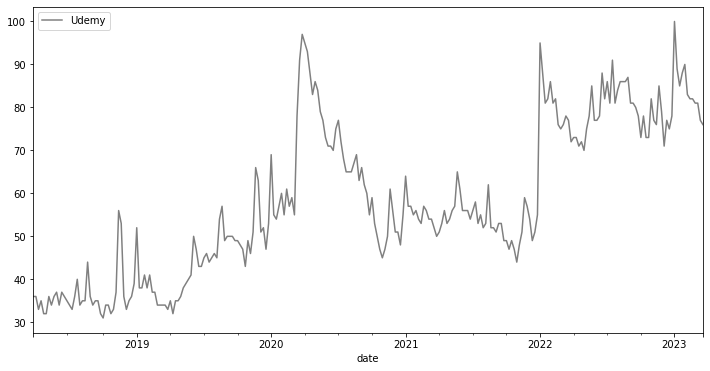

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
df_udemy.plot(ax=ax, color = 'grey')

In [30]:
kw_list_edx = ['Edx']

In [31]:
pytrend.build_payload(kw_list_edx, timeframe='today 5-y')

In [32]:
df_edx = pytrend.interest_over_time()

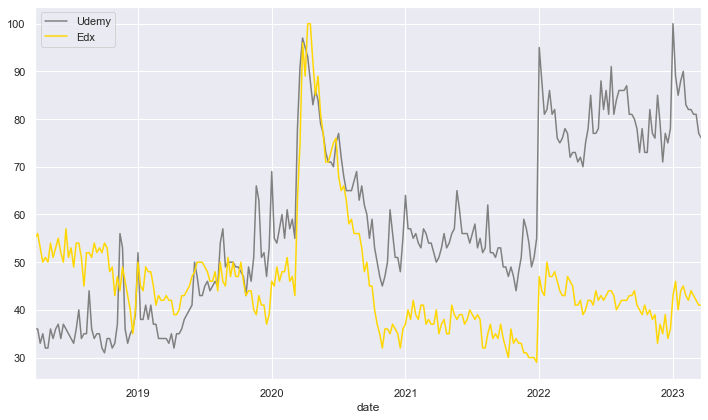

In [125]:
ax = df_udemy.plot(color = 'grey')
df_edx.plot(ax=ax, color = 'gold')

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True


plt.show()

In [34]:
Path('udemy_sql.db').touch()


In [35]:
udemy_conn = sqlite3.connect(r'C:\Users\Draseczka\Desktop\SGH stuff\udemy_courses.db')
udemy_cursor = udemy_conn.cursor()

In [36]:
udemy.to_sql('udemy', udemy_conn, if_exists='append', index=False)


3678

In [37]:
udemy_query = pd.read_sql(''' SELECT * FROM udemy ''', udemy_conn)


In [38]:
udemy_query

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968.0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822.0,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314.0,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588.0,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058.0,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
22063,NaN,None,None,1,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
22064,NaN,None,None,1,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
22065,NaN,None,None,1,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
22066,NaN,None,None,1,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [122]:
udemy_subjects_by_subs = pd.read_sql(''' SELECT SUM(num_subscribers)/1000000 AS subscribers, subject
                             FROM udemy
                             GROUP BY subject
                             ORDER BY subscribers DESC
                             ''', udemy_conn)
udemy_subjects_by_subs

,subscribers,subject
0,47,Web Development
1,11,Business Finance
2,6,Graphic Design
3,5,Musical Instruments


In [123]:
udemy_subjects_by_subs_csv = udemy_subjects_by_subs.to_csv('udemy_subjects_by_subs.csv')

In [94]:
udemy_avg_price_by_subject = pd.read_sql('''SELECT subject, AVG(price) AS avg_price
                                        FROM udemy
                                        GROUP BY subject
                                        ORDER BY avg_price DESC
                                        LIMIT 8''', udemy_conn)

udemy_avg_price_by_subject

,subject,avg_price
0,Web Development,77.033333
1,Business Finance,68.552301
2,Graphic Design,57.827529
3,Musical Instruments,49.558824


In [95]:
udemy_avg_price_by_subject_csv = udemy_avg_price_by_subject.to_csv('udemy_avg_price_by_subject.csv')

In [39]:
query_level_udemy = pd.read_sql(''' SELECT level, COUNT(level) AS level_count, num_subscribers
                        FROM udemy
                        GROUP BY level
                        ORDER BY num_subscribers DESC ''', udemy_conn)
query_level_udemy

,level,level_count,num_subscribers
0,Expert Level,348,5172
1,Intermediate Level,2526,2174
2,All Levels,11574,2147
3,Beginner Level,7620,1540


<AxesSubplot:xlabel='level'>

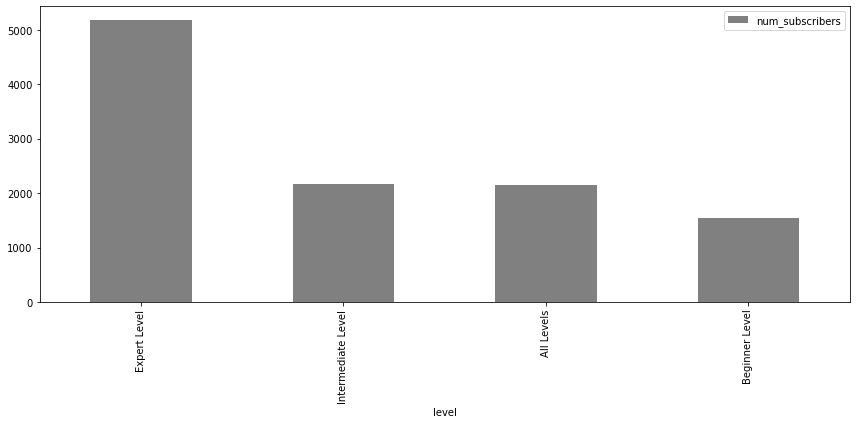

In [40]:
query_level_udemy.plot(kind='bar', x = 'level', y = 'num_subscribers', color = 'grey')

In [87]:
query_level_udemy_csv = query_level_udemy.to_csv('query_level_udemy.csv')

In [76]:
query_subject_udemy = pd.read_sql('''SELECT subject, COUNT(price) AS course_count, AVG(num_subscribers) AS avg_subscribers
                                     FROM udemy
                                     GROUP BY subject''', udemy_conn)
query_subject_udemy

,subject,course_count,avg_subscribers
0,Business Finance,7170,1563.774895
1,Graphic Design,3618,1763.097844
2,Musical Instruments,4080,1245.130882
3,Web Development,7200,6650.476667


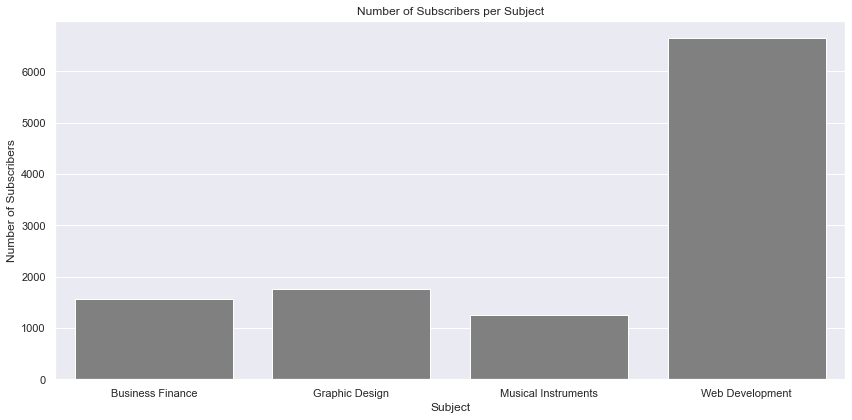

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(data=query_subject_udemy, x='subject', y='avg_subscribers', color='grey')
plt.title('Number of Subscribers per Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Subscribers')
plt.show()

In [88]:
query_subject_udemy_csv = query_subject_udemy.to_csv('query_subject_udemy.csv')

In [77]:
query_level_subject_udemy = pd.read_sql('''SELECT level, subject, COUNT(price) AS course_count, AVG(num_lectures) AS avg_lectures
                                            FROM udemy
                                            GROUP BY level, subject''', udemy_conn)
query_level_subject_udemy

,level,subject,course_count,avg_lectures
0,All Levels,Business Finance,4176,37.127874
1,All Levels,Graphic Design,1788,35.718121
2,All Levels,Musical Instruments,1656,42.586957
3,All Levels,Web Development,3954,61.394537
4,Beginner Level,Business Finance,2040,27.438235
5,Beginner Level,Graphic Design,1458,29.329218
6,Beginner Level,Musical Instruments,1776,33.601351
7,Beginner Level,Web Development,2346,39.657289
8,Expert Level,Business Finance,186,19.774194
9,Expert Level,Graphic Design,30,33.800000


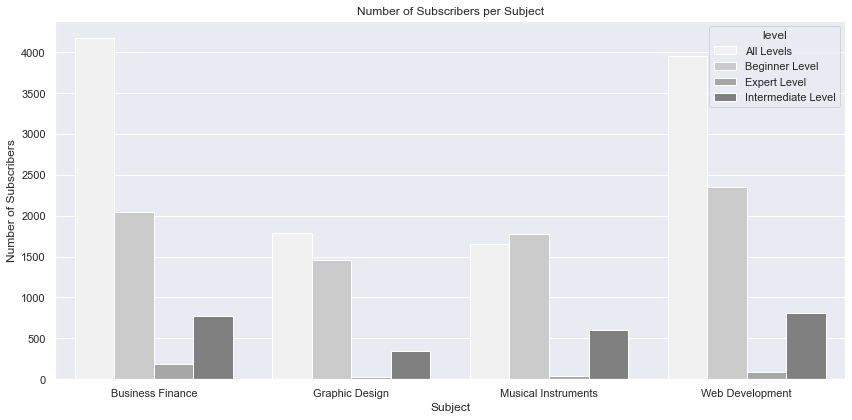

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(data=query_level_subject_udemy, x='subject', y='course_count', hue = 'level', color='grey')
plt.title('Number of Subscribers per Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Subscribers')
plt.show()

In [89]:
query_level_subject_udemy_csv = query_level_subject_udemy.to_csv('query_level_subject_udemy.csv')

In [41]:
edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [42]:
edx.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [43]:
edx['n_enrolled'] = edx['n_enrolled'].str.replace(',', '').astype(float)

In [44]:
edx['price'] = edx['price'].str.replace('FREE-Add a Verified Certificate for', '')
edx['price'] = edx['price'].str.replace('$', '')
edx['price'] = edx['price'].str.replace('USD', '')

C:\Users\DRASEC~1\AppData\Local\Temp/ipykernel_10008/242485523.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  edx['price'] = edx['price'].str.replace('$', '')


In [45]:
edx['price'] = edx['price'].astype(float)

In [46]:
edx.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [47]:
edx = edx.drop(columns = ['course_url'])

In [48]:
edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
dtype: int64

In [49]:
edx = edx.dropna(subset=['n_enrolled'])

In [50]:
edx.isna().sum()

title                   0
summary                49
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     33
course_syllabus       492
dtype: int64

array([[<AxesSubplot:title={'center':'n_enrolled'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

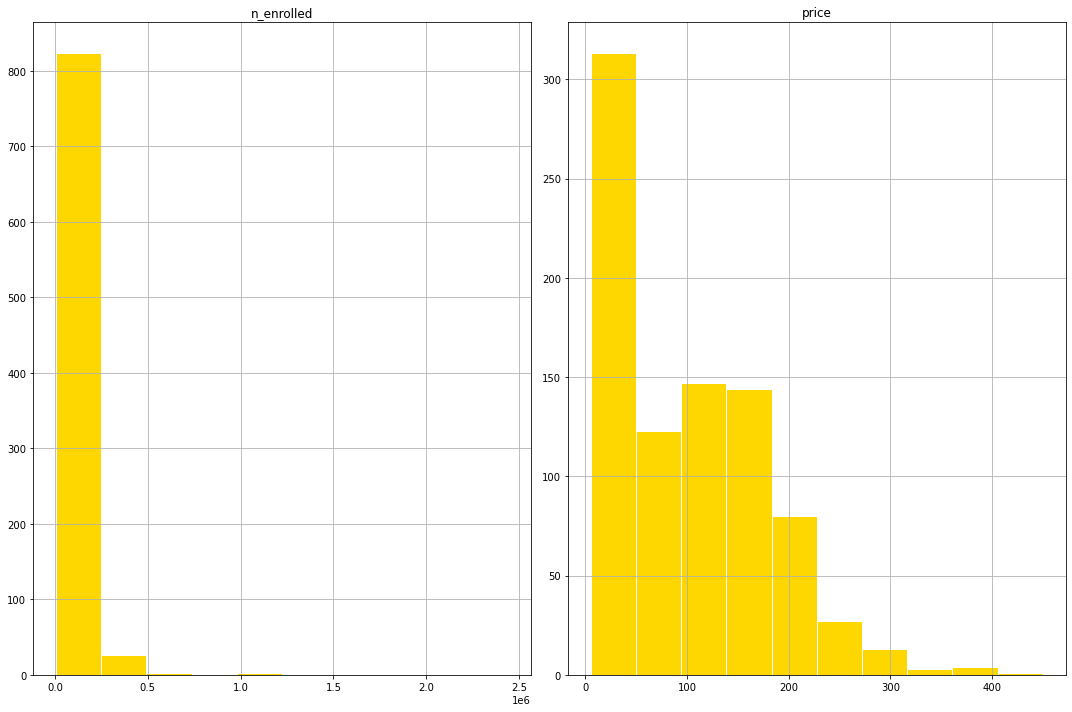

In [51]:
edx.hist(figsize=(15, 10), edgecolor='white', color='gold', grid=True)

In [52]:
edx_col_num = edx[['n_enrolled', 'price']]

In [53]:
edx_outliers = (np.abs(stats.zscore(edx_col_num)) < 3).all(axis=1)

In [54]:
outlier_rows_edx = edx_col_num[~edx_outliers]

In [55]:
edx_col_num_filtered = edx_col_num[edx_outliers]

array([[<AxesSubplot:title={'center':'n_enrolled'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

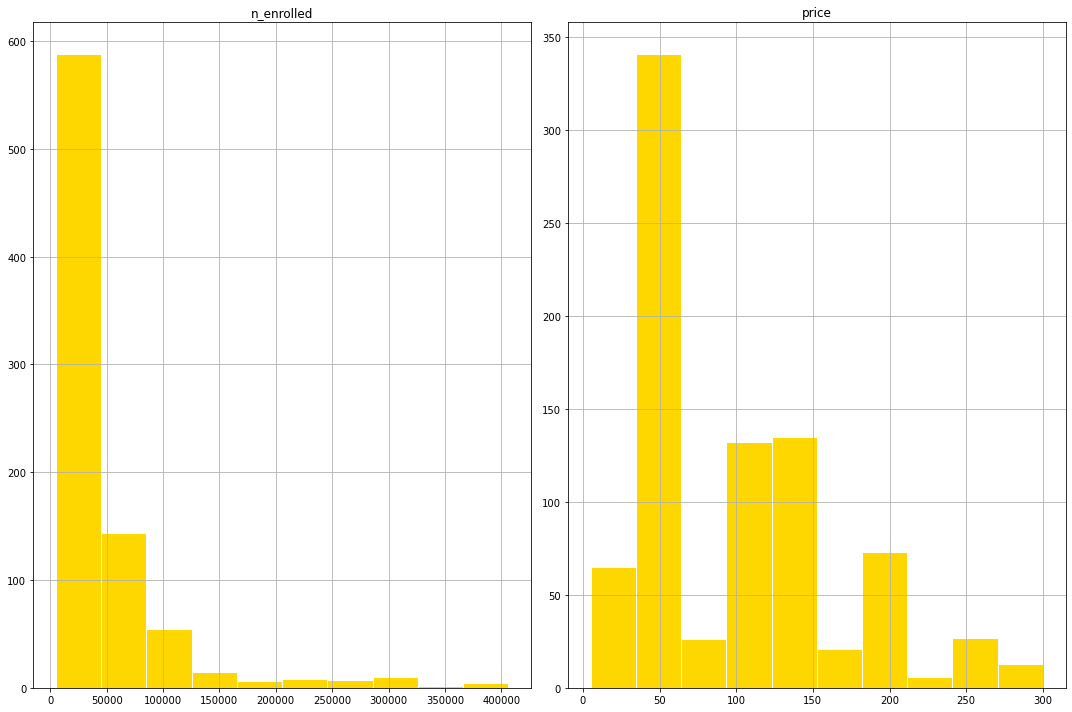

In [56]:
edx_col_num_filtered.hist(figsize=(15, 10), edgecolor='white', color='gold', grid=True)


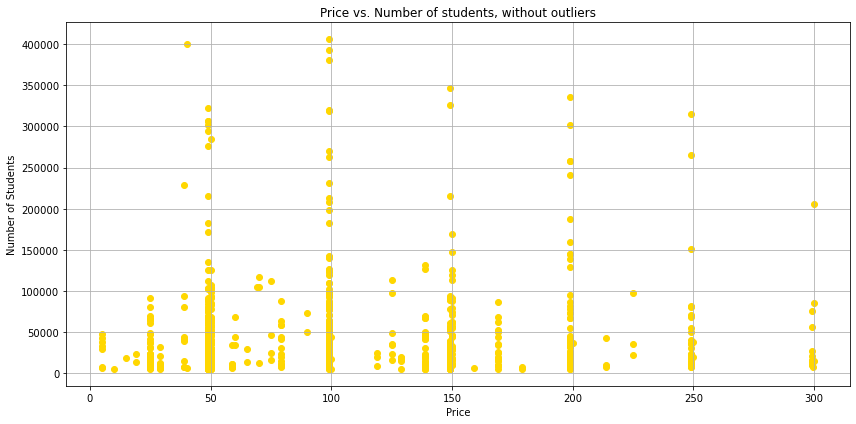

In [57]:
plt.scatter(edx_col_num_filtered['price'], edx_col_num_filtered['n_enrolled'], color = 'gold')
plt.title('Price vs. Number of students, without outliers')
plt.xlabel('Price')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

In [58]:
Path('edx_sql.db').touch()

In [59]:
edx_conn = sqlite3.connect(r'C:\Users\Draseczka\Desktop\SGH stuff\edx_courses.db')
edx_cursor = edx_conn.cursor()

In [60]:
edx.to_sql('edx_sql', edx_conn, if_exists='append', index=False)


855

In [61]:
edx_query = pd.read_sql(''' SELECT * FROM edx_sql ''', edx_conn)


In [62]:
edx_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,None,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",None,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",None,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,None,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,StudioX: Creating a Course with edX Studio,Learn the fundamentals of creating courses on ...,20355.0,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,English,English,4–6 hours per week,3 Weeks,99.0,"In this course, we will introduce you to edX S...",None,None
7556,Introducción a las ondas gravitacionales,"En este curso, junto con la Dra. Gabriela Gonz...",8657.0,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,Español,"English, Español",5–7 hours per week,4 Weeks,50.0,En este curso conocerás sobre las ondas gravit...,Introducción: En este curso vamos a hablar de ...,None
7557,Global China: From the Mongols to the Ming,Explore the impact of the conquest dynasties a...,41902.0,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15 Weeks,139.0,"In the 13th century, by force of arms, the Mon...",None,None
7558,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246.0,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,None


In [117]:
edx_subjects_by_subs = pd.read_sql(''' SELECT SUM(n_enrolled)/1000000 AS subscribers, subject
                             FROM edx_sql
                             GROUP BY subject
                             ORDER BY subscribers DESC
                             LIMIT 10
                             ''', edx_conn)
edx_subjects_by_subs

,subscribers,subject
0,24.955144,Computer Science
1,14.195180,Business & Management
2,9.297648,Communication
3,8.554234,Data Analysis & Statistics
4,7.029136,Humanities
5,3.699672,Social Sciences
6,3.538152,Biology & Life Sciences
7,2.801928,Engineering
8,2.132814,Language
9,1.985398,Medicine


In [118]:
edx_subjects_by_subs_csv = edx_subjects_by_subs.to_csv('edx_subjects_by_subs.csv')

In [63]:
query_course_effort_edx = pd.read_sql(''' SELECT course_effort, COUNT(course_effort) AS course_effort_count,
                             100 * COUNT(course_effort) / (SELECT COUNT(*) FROM edx_sql) AS course_effort_pct
                             FROM edx_sql
                             GROUP BY course_effort
                             ORDER BY course_effort_count DESC
                             LIMIT 10''', edx_conn)
query_course_effort_edx

,course_effort,course_effort_count,course_effort_pct
0,2–4 hours per week,844,11
1,2–3 hours per week,812,10
2,3–5 hours per week,802,10
3,3–4 hours per week,716,9
4,4–6 hours per week,608,8
5,8–10 hours per week,450,5
6,1–2 hours per week,428,5
7,4–5 hours per week,424,5
8,6–8 hours per week,400,5
9,5–7 hours per week,212,2


In [64]:
query_level_edx = pd.read_sql(''' SELECT Level, COUNT(Level) AS level_count, n_enrolled
                        FROM edx_sql
                        GROUP BY Level
                        ORDER BY n_enrolled DESC ''', edx_conn)
query_level_edx

,Level,level_count,n_enrolled
0,Intermediate,2076,"129,555"
1,Introductory,4810,"124,980"
2,Advanced,674,"103,640"


In [65]:
query_level_edx['n_enrolled'] = query_level_edx['n_enrolled'].str.replace(',', '').astype(float)

In [66]:
query_level_edx

,Level,level_count,n_enrolled
0,Intermediate,2076,129555.0
1,Introductory,4810,124980.0
2,Advanced,674,103640.0


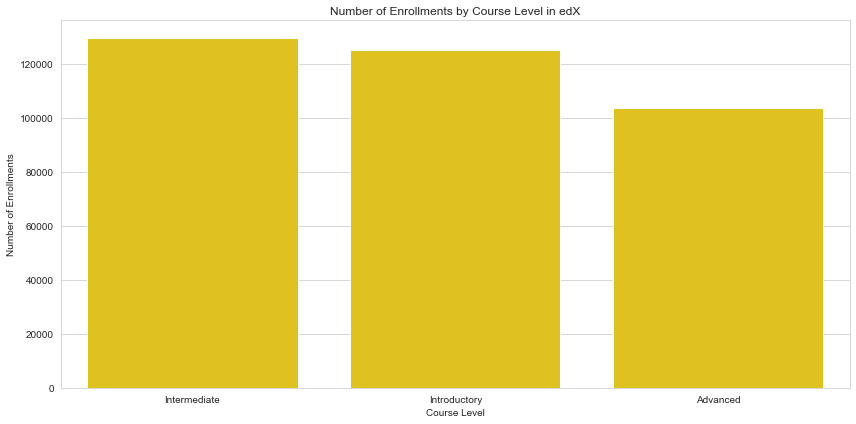

In [67]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=query_level_edx, x='Level', y='n_enrolled', color='gold', ax=ax)

ax.set_title('Number of Enrollments by Course Level in edX')
ax.set_xlabel('Course Level')
ax.set_ylabel('Number of Enrollments')
plt.show()

In [90]:
query_level_edx_csv = query_level_edx.to_csv('query_level_edx.csv')

In [68]:
edx_institution = pd.read_sql('''SELECT institution, COUNT(title) AS course_count
                                FROM edx_sql
                                GROUP BY institution
                                ORDER BY course_count DESC
                                LIMIT 20''', edx_conn)

edx_institution

,institution,course_count
0,Harvard University,832
1,Universitat Politècnica de Valencia,372
2,Massachusetts Institute of Technology,320
3,Delft University of Technology,236
4,Inter-American Development Bank,228
5,IBM,224
6,The University of Queensland,204
7,The University of Michigan,172
8,"University of California, Berkeley",160
9,Columbia University,160


Text(0.5, 1.0, 'Number of Courses by Institution')

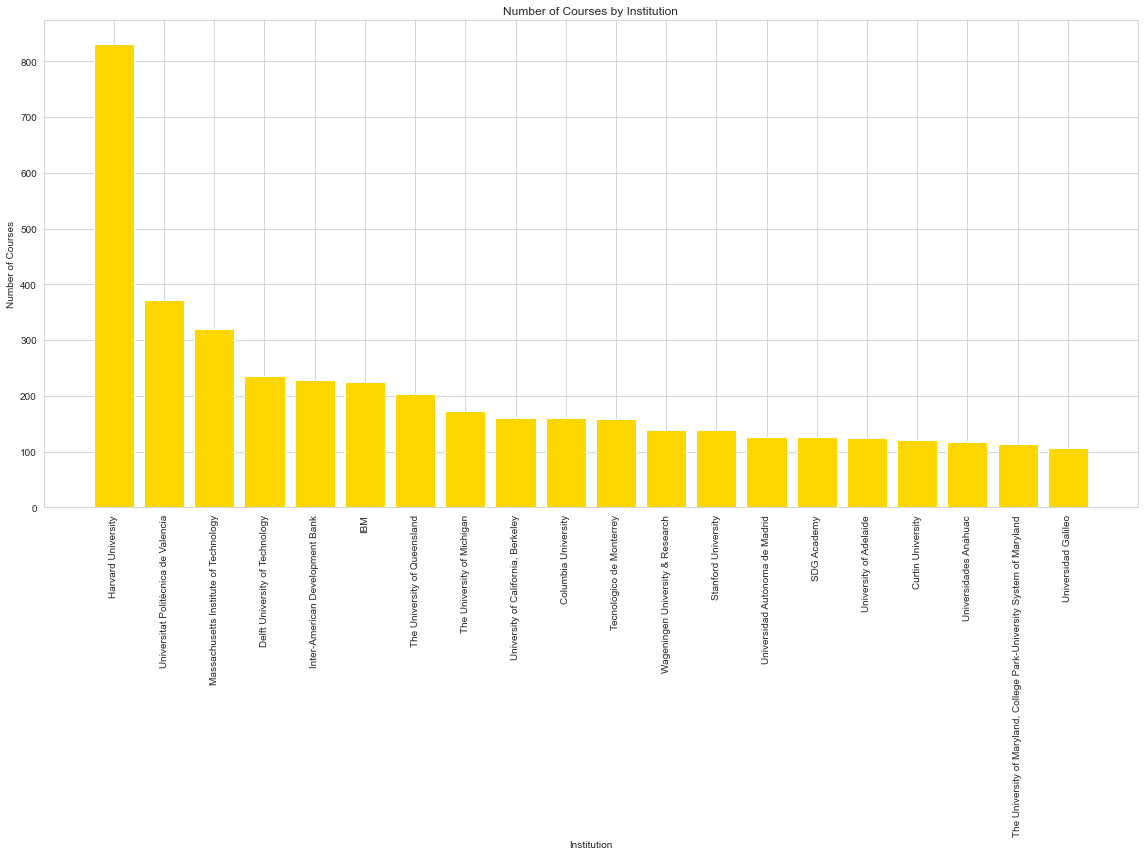

In [69]:
plt.figure(figsize=(16, 12))
plt.bar(x='institution', height='course_count', data=edx_institution, color = 'gold')
plt.xticks(rotation=90)
plt.xlabel('Institution')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Institution')

In [91]:
edx_institution_csv = edx_institution.to_csv('edx_institution.csv') 

In [70]:
edx_avg_price_by_subject = pd.read_sql('''SELECT subject, AVG(price) AS avg_price
                                        FROM edx_sql
                                        GROUP BY subject
                                        ORDER BY avg_price DESC
                                        LIMIT 8''', edx_conn)

edx_avg_price_by_subject

,subject,avg_price
0,Business & Management,30.951411
1,Literature,30.375000
2,Computer Science,29.272068
3,Law,27.461538
4,Engineering,26.829596
5,Electronics,25.928571
6,Energy & Earth Sciences,25.896552
7,Design,24.687500


In [126]:
edx_avg_price_by_subject_csv = edx_avg_price_by_subject.to_csv('edx_avg_price_by_subject.csv')

Text(0.5, 1.0, 'Average Price by Subject')

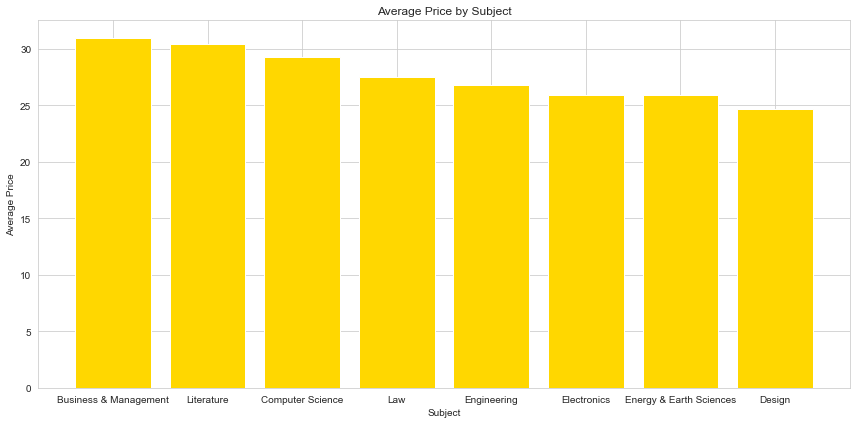

In [71]:
plt.figure(figsize=(12, 6))
plt.bar(x='subject', height='avg_price', data=edx_avg_price_by_subject, color='gold')
plt.xlabel('Subject')
plt.ylabel('Average Price')
plt.title('Average Price by Subject')

In [92]:
edx_avg_price_by_subject_csv = edx_avg_price_by_subject.to_csv('edx_avg_price_by_subject.csv')

In [72]:
edx_course_count_by_level_and_subject = pd.read_sql('''SELECT level, subject, COUNT(title) AS course_count
                                                    FROM edx_sql
                                                    GROUP BY level, subject
                                                    ORDER BY course_count DESC
                                                    LIMIT 10''', edx_conn)

edx_course_count_by_level_and_subject

,Level,subject,course_count
0,Introductory,Computer Science,780
1,Introductory,Business & Management,760
2,Introductory,Humanities,468
3,Intermediate,Business & Management,430
4,Intermediate,Computer Science,402
5,Introductory,Data Analysis & Statistics,288
6,Introductory,Social Sciences,282
7,Introductory,Communication,240
8,Introductory,Language,186
9,Introductory,Biology & Life Sciences,184


Text(0.5, 1.0, 'Number of Courses by Level and Subject')

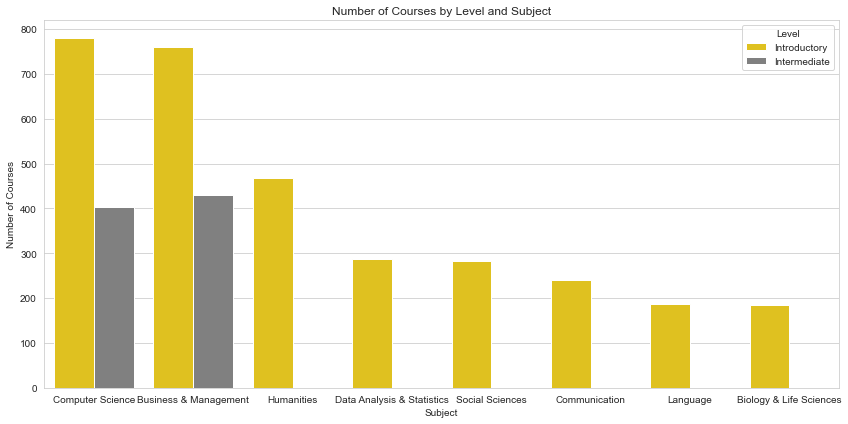

In [73]:
plt.figure(figsize=(12, 6))
custom_palette = {'Introductory': 'gold', 'Intermediate': 'grey'}
sns.barplot(x='subject', y='course_count', hue='Level', data=edx_course_count_by_level_and_subject, palette=custom_palette)
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Level and Subject')

In [93]:
edx_course_count_by_level_and_subject_csv = edx_course_count_by_level_and_subject.to_csv('edx_course_count_by_level_and_subject.csv')

In [98]:
query_level_subject_edx = pd.read_sql('''SELECT Level, subject, COUNT(title) AS course_count
                                            FROM edx_sql
                                            GROUP BY level, subject''', edx_conn)
query_level_subject_edx

,Level,subject,course_count
0,Advanced,Biology & Life Sciences,32
1,Advanced,Business & Management,86
2,Advanced,Communication,8
3,Advanced,Computer Science,114
4,Advanced,Data Analysis & Statistics,102
...,...,...,...
65,Introductory,Philanthropy,6
66,Introductory,Philosophy & Ethics,48
67,Introductory,Physics,48
68,Introductory,Science,64


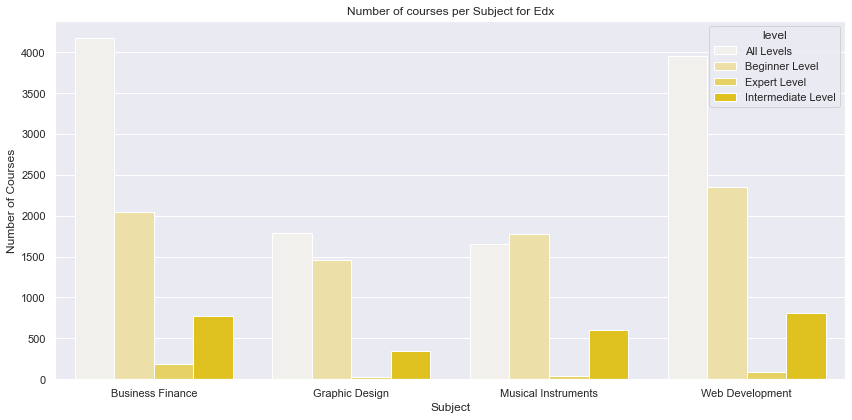

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(data=query_level_subject_udemy, x='subject', y='course_count', hue = 'level', color='gold')
plt.title('Number of courses per Subject for Edx')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.show()

In [102]:
query_level_subject_edx_csv = query_level_subject_edx.to_csv('query_level_subject_edx.csv') 